In [1]:
import pandas as pd
import requests
import matplotlib


In [2]:
format='%Y%m%d'

In [3]:
url_world = "https://pomber.github.io/covid19/timeseries.json"

res_world_count = requests.get(url_world).json()

df_country_data = pd.DataFrame.from_dict(res_world_count.get("US"),orient='columns')

In [4]:
df_country_data["date"] = pd.to_datetime(df_country_data["date"], format='%Y-%m-%d')

In [5]:
df_country_data_after_date = df_country_data[df_country_data['date'] >= "2021-10-20"]
df_country_data_till_date = df_country_data_after_date[df_country_data_after_date['date'] <= "2021-11-21"]

In [6]:
df_country_data_till_date.date.dt.strftime("%Y-%m-%d")

637    2021-10-20
638    2021-10-21
639    2021-10-22
640    2021-10-23
641    2021-10-24
642    2021-10-25
643    2021-10-26
644    2021-10-27
645    2021-10-28
646    2021-10-29
647    2021-10-30
648    2021-10-31
649    2021-11-01
650    2021-11-02
651    2021-11-03
652    2021-11-04
653    2021-11-05
654    2021-11-06
655    2021-11-07
656    2021-11-08
657    2021-11-09
658    2021-11-10
659    2021-11-11
660    2021-11-12
661    2021-11-13
662    2021-11-14
663    2021-11-15
664    2021-11-16
665    2021-11-17
666    2021-11-18
667    2021-11-19
668    2021-11-20
669    2021-11-21
Name: date, dtype: object

In [8]:
df_country_data_till_date.head()

,date,confirmed,deaths,recovered
637,2021-10-20,45267256,733356,0
638,2021-10-21,45346152,735339,0
639,2021-10-22,45441301,737230,0
640,2021-10-23,45470179,737735,0
641,2021-10-24,45487602,737945,0


In [7]:
test_df = df_country_data_till_date

In [10]:
test_df['confirmed_daily']=test_df['confirmed'].diff().fillna(test_df['confirmed'])
test_df.head()


/var/folders/d_/5fj9_qbs35qb24skz6z1nkpw0000gn/T/ipykernel_1879/481167319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['confirmed_daily']=test_df['confirmed'].diff().fillna(test_df['confirmed'])


,date,confirmed,deaths,recovered,confirmed_daily
637,2021-10-20,45267256,733356,0,45267256.0
638,2021-10-21,45346152,735339,0,78896.0
639,2021-10-22,45441301,737230,0,95149.0
640,2021-10-23,45470179,737735,0,28878.0
641,2021-10-24,45487602,737945,0,17423.0


In [15]:
test_df['confirmed_daily'].iloc[0] = test_df['confirmed_daily'].iloc[1] - 20000

/Users/digantgarude/miniconda3/envs/ir/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
test_df.head()

,date,confirmed,deaths,recovered,confirmed_daily
637,2021-10-20,45267256,733356,0,38896.0
638,2021-10-21,45346152,735339,0,78896.0
639,2021-10-22,45441301,737230,0,95149.0
640,2021-10-23,45470179,737735,0,28878.0
641,2021-10-24,45487602,737945,0,17423.0


In [3]:
US_API = "https://api.covidtracking.com/v1/us/daily.json"

In [8]:
us_data_raw = requests.get(US_API).json()

In [9]:
us_data_raw

[{'date': 20210307,
  'states': 56,
  'positive': 28756489,
  'negative': 74582825,
  'pending': 11808,
  'hospitalizedCurrently': 40199,
  'hospitalizedCumulative': 776361,
  'inIcuCurrently': 8134,
  'inIcuCumulative': 45475,
  'onVentilatorCurrently': 2802,
  'onVentilatorCumulative': 4281,
  'dateChecked': '2021-03-07T24:00:00Z',
  'death': 515151,
  'hospitalized': 776361,
  'totalTestResults': 363825123,
  'lastModified': '2021-03-07T24:00:00Z',
  'recovered': None,
  'total': 0,
  'posNeg': 0,
  'deathIncrease': 842,
  'hospitalizedIncrease': 726,
  'negativeIncrease': 131835,
  'positiveIncrease': 41835,
  'totalTestResultsIncrease': 1170059,
  'hash': 'a80d0063822e251249fd9a44730c49cb23defd83'},
 {'date': 20210306,
  'states': 56,
  'positive': 28714654,
  'negative': 74450990,
  'pending': 11783,
  'hospitalizedCurrently': 41401,
  'hospitalizedCumulative': 775635,
  'inIcuCurrently': 8409,
  'inIcuCumulative': 45453,
  'onVentilatorCurrently': 2811,
  'onVentilatorCumulative

In [26]:
df_us_data = pd.DataFrame.from_records(us_data_raw) 

In [27]:
df_us_data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


In [31]:
df_us_data.hospitalizedCurrently.fillna(0,inplace=True)

In [32]:
df_us_data.tail()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
415,20200117,1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,None,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
416,20200116,1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,None,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
417,20200115,1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,None,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
418,20200114,1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,None,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8
419,20200113,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,2020-01-13T24:00:00Z,None,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff


In [33]:
len(df_us_data[df_us_data['hospitalizedCurrently']!=0.0])

356

In [46]:
df_us_data["date"] = pd.to_datetime(df_us_data["date"], format='%Y%m%d')

<AxesSubplot:xlabel='date'>

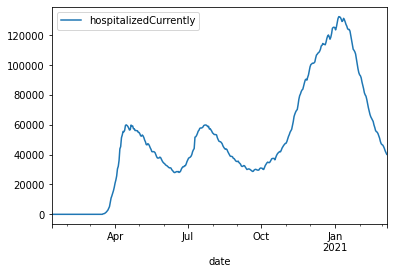

In [58]:
df_us_data.plot(x='date', y='hospitalizedCurrently')

In [34]:
OUR_WORLD_DATA_URL = "https://covid.ourworldindata.org/data/owid-covid-data.json"

# world_data_json = requests.get(OUR_WORLD_DATA_URL).json()

In [2]:
# Load Data
vaccinations_india_df = pd.read_csv("./Datasets/Vaccinations/India.csv")
vaccinations_usa_df = pd.read_csv("./Datasets/Vaccinations/United_States.csv")
vaccinations_mexico_df = pd.read_csv("./Datasets/Vaccinations/Mexico.csv")
# Clean Data 
vaccinations_india_df.fillna(0)
vaccinations_usa_df.fillna(0)
vaccinations_mexico_df.fillna(0)


,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Mexico,2020-12-24,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/267-la-vacuna-...,2924,2924.0,0.0,0.0
1,Mexico,2020-12-27,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/269-continua-j...,6824,6824.0,0.0,0.0
2,Mexico,2020-12-28,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/271-se-han-apl...,9579,9579.0,0.0,0.0
3,Mexico,2020-12-29,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/273-se-han-apl...,18529,18529.0,0.0,0.0
4,Mexico,2020-12-30,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/274-secretaria...,24998,24998.0,0.0,0.0
...,...,...,...,...,...,...,...,...
303,Mexico,2021-11-28,"Johnson&Johnson, Oxford/AstraZeneca, Moderna, ...",http://www.gob.mx/cms/uploads/attachment/file/...,132308788,76609987.0,64922896.0,0.0
304,Mexico,2021-11-29,"Johnson&Johnson, Oxford/AstraZeneca, Moderna, ...",http://www.gob.mx/cms/uploads/attachment/file/...,132422896,76685147.0,64971111.0,0.0
305,Mexico,2021-11-30,"Johnson&Johnson, Oxford/AstraZeneca, Moderna, ...",http://www.gob.mx/cms/uploads/attachment/file/...,132636811,76845255.0,65038728.0,0.0
306,Mexico,2021-12-01,"Johnson&Johnson, Oxford/AstraZeneca, Moderna, ...",http://www.gob.mx/cms/uploads/attachment/file/...,132840902,77011430.0,65089672.0,0.0


In [3]:
vaccinations_mexico_df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Mexico,2020-12-24,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/267-la-vacuna-...,2924,2924.0,NaN,NaN
1,Mexico,2020-12-27,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/269-continua-j...,6824,6824.0,NaN,NaN
2,Mexico,2020-12-28,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/271-se-han-apl...,9579,9579.0,NaN,NaN
3,Mexico,2020-12-29,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/273-se-han-apl...,18529,18529.0,NaN,NaN
4,Mexico,2020-12-30,Pfizer/BioNTech,https://www.gob.mx/salud/prensa/274-secretaria...,24998,24998.0,NaN,NaN


In [4]:
vaccinations_india_df.head()


,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,source_url,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0,0,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",191181,191181,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",224301,224301,0,https://twitter.com/MoHFW_INDIA/status/1350815...,NaN
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",454049,454049,0,https://www.mohfw.gov.in/,NaN
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",674835,674835,0,https://www.mohfw.gov.in/,NaN


In [5]:
vaccinations_india_df['total_vaccinations_daily']=vaccinations_india_df['total_vaccinations'].diff().fillna(vaccinations_india_df['total_vaccinations'])
vaccinations_india_df['people_vaccinated_daily']=vaccinations_india_df['people_vaccinated'].diff().fillna(vaccinations_india_df['people_vaccinated'])
vaccinations_india_df['people_fully_vaccinated_daily']=vaccinations_india_df['people_fully_vaccinated'].diff().fillna(vaccinations_india_df['people_fully_vaccinated'])

In [6]:
vaccinations_india_df.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,source_url,total_boosters,total_vaccinations_daily,people_vaccinated_daily,people_fully_vaccinated_daily
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0,0,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN,0.0,0.0,0.0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",191181,191181,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN,191181.0,191181.0,0.0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",224301,224301,0,https://twitter.com/MoHFW_INDIA/status/1350815...,NaN,33120.0,33120.0,0.0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",454049,454049,0,https://www.mohfw.gov.in/,NaN,229748.0,229748.0,0.0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",674835,674835,0,https://www.mohfw.gov.in/,NaN,220786.0,220786.0,0.0


In [2]:
df = pd.read_csv("./Datasets/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")

In [3]:
df.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_influenza_confirmed,previous_day_admission_influenza_confirmed_coverage,previous_day_deaths_covid_and_influenza,previous_day_deaths_covid_and_influenza_coverage,previous_day_deaths_influenza,previous_day_deaths_influenza_coverage,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,total_patients_hospitalized_confirmed_influenza_and_covid_coverage,total_patients_hospitalized_confirmed_influenza_coverage
0,VI,2020/10/18,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0
1,VT,2020/10/17,1,15,1,1,15,1,0.0,16,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0
2,NH,2020/10/15,5,25,0,5,25,0,1.0,30,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0
3,NH,2020/10/13,3,27,0,5,25,0,1.0,30,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0
4,NH,2020/10/12,3,27,0,5,25,0,1.0,30,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0


In [4]:
df["date"] = pd.to_datetime(df["date"], format='%Y/%m/%d')

In [5]:
specific_df = df[df['date']=="2020-10-8"]

In [11]:
df_texas = df[df['state']=="TX"]

In [7]:
grouped_data_us  = df.groupby("state", axis = 0).sum()

In [8]:
list(grouped_data_us.columns)

['critical_staffing_shortage_today_yes',
 'critical_staffing_shortage_today_no',
 'critical_staffing_shortage_today_not_reported',
 'critical_staffing_shortage_anticipated_within_week_yes',
 'critical_staffing_shortage_anticipated_within_week_no',
 'critical_staffing_shortage_anticipated_within_week_not_reported',
 'hospital_onset_covid',
 'hospital_onset_covid_coverage',
 'inpatient_beds',
 'inpatient_beds_coverage',
 'inpatient_beds_used',
 'inpatient_beds_used_coverage',
 'inpatient_beds_used_covid',
 'inpatient_beds_used_covid_coverage',
 'previous_day_admission_adult_covid_confirmed',
 'previous_day_admission_adult_covid_confirmed_coverage',
 'previous_day_admission_adult_covid_suspected',
 'previous_day_admission_adult_covid_suspected_coverage',
 'previous_day_admission_pediatric_covid_confirmed',
 'previous_day_admission_pediatric_covid_confirmed_coverage',
 'previous_day_admission_pediatric_covid_suspected',
 'previous_day_admission_pediatric_covid_suspected_coverage',
 'staffe

In [9]:
grouped_data_us.index

Index(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
       'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='state')

<AxesSubplot:xlabel='date'>

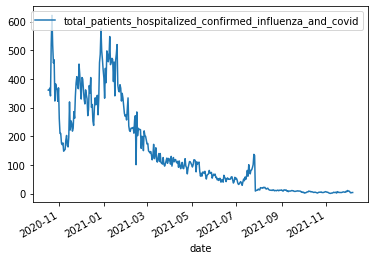

In [12]:
df_texas.plot('date', "total_patients_hospitalized_confirmed_influenza_and_covid")

/Users/digantgarude/miniconda3/envs/ir/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


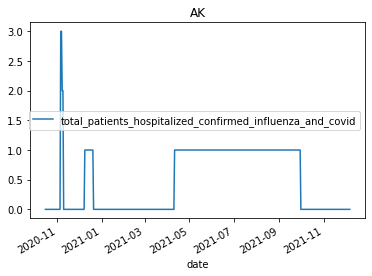

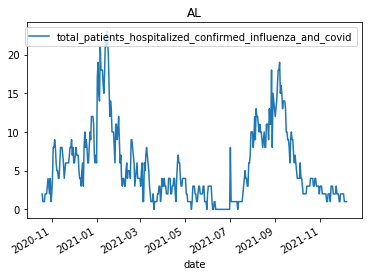

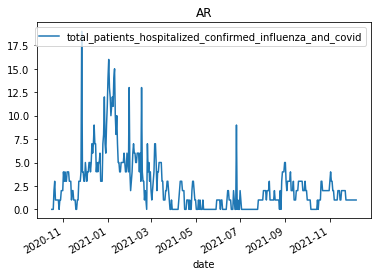

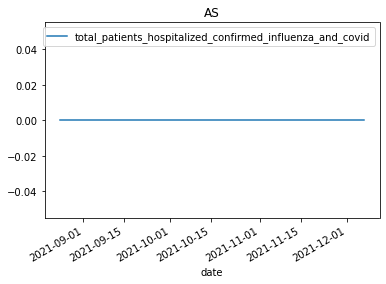

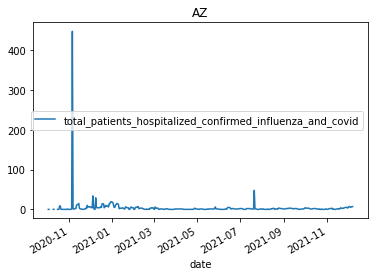

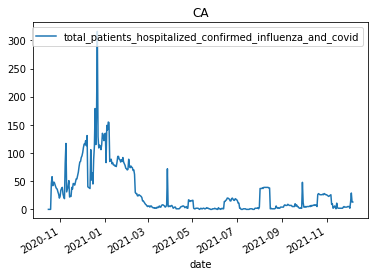

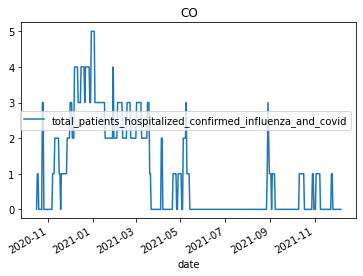

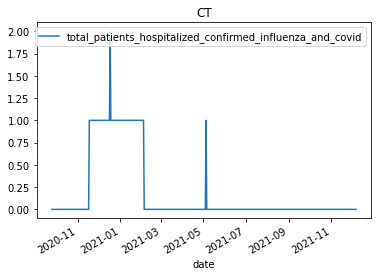

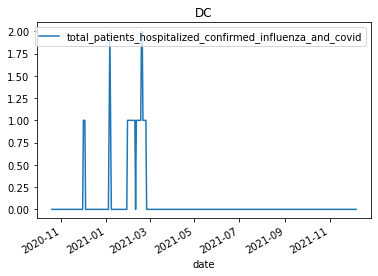

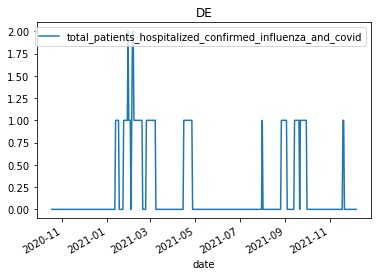

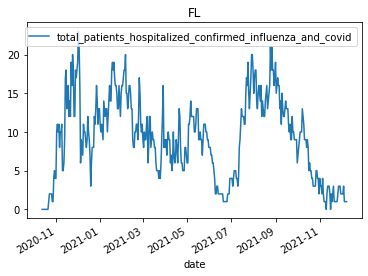

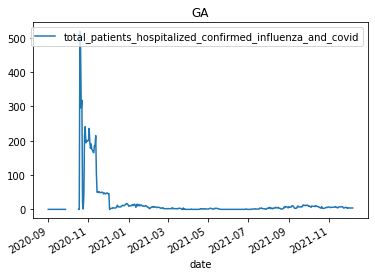

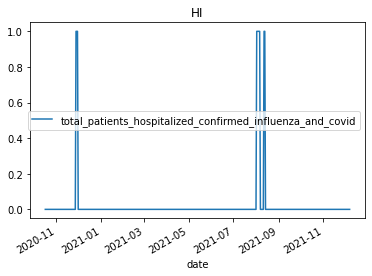

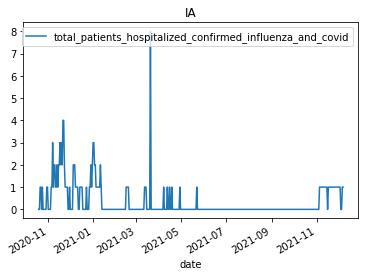

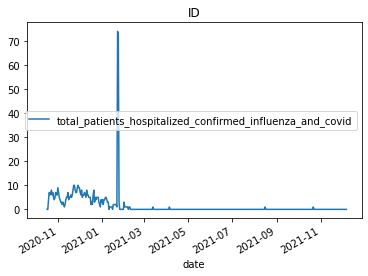

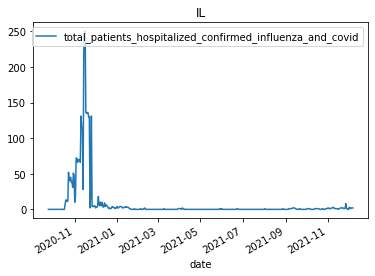

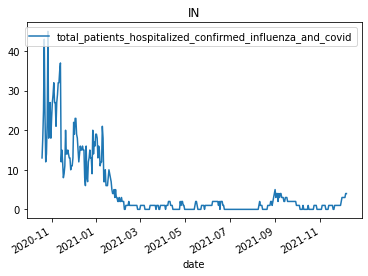

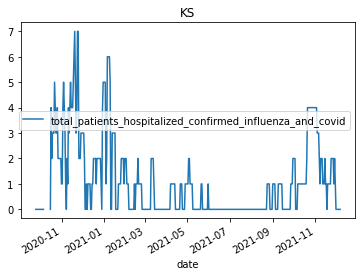

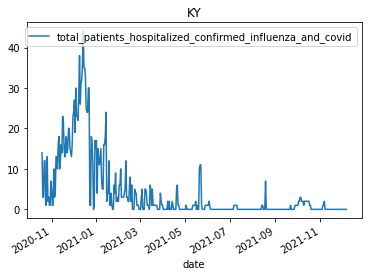

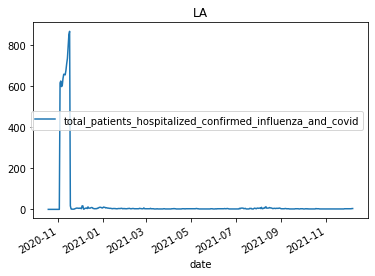

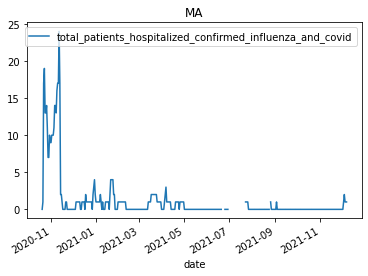

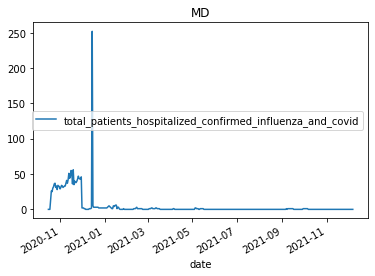

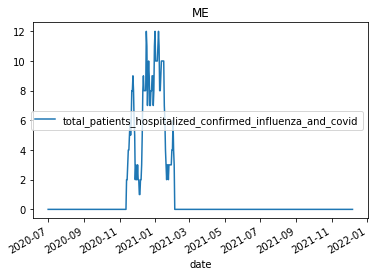

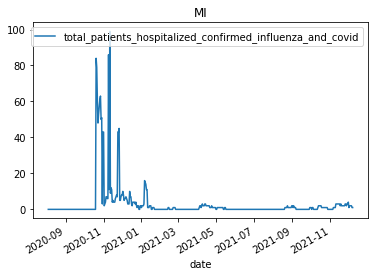

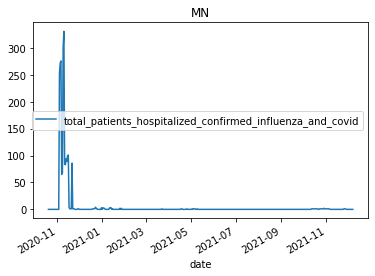

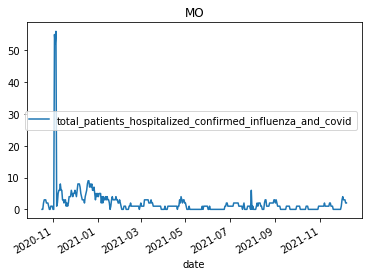

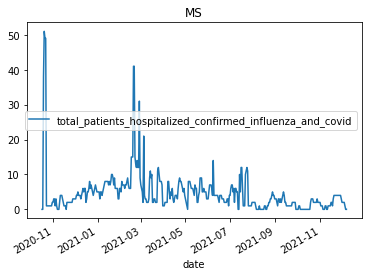

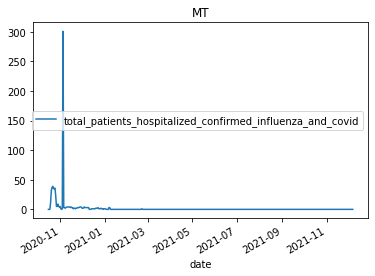

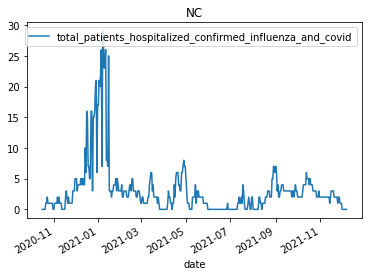

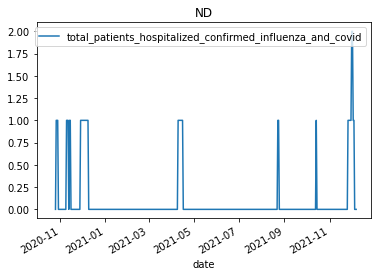

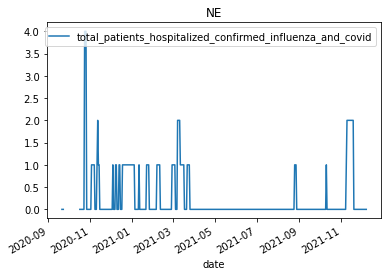

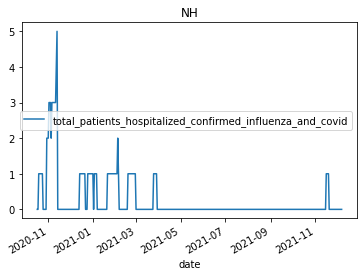

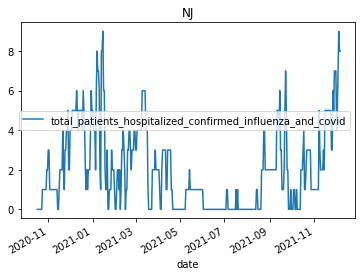

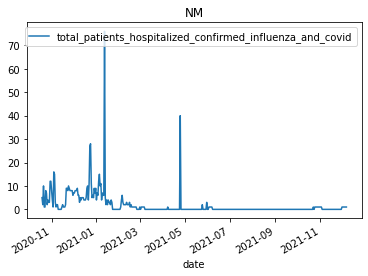

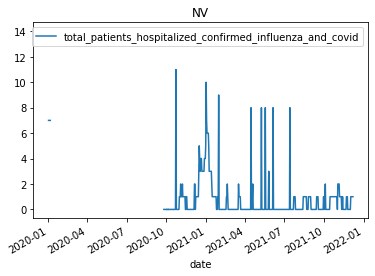

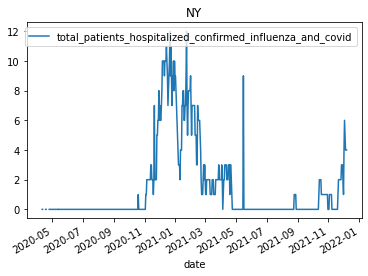

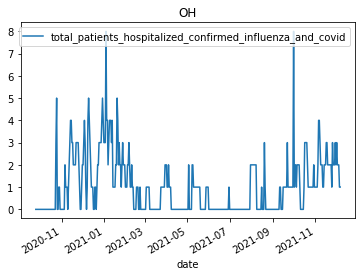

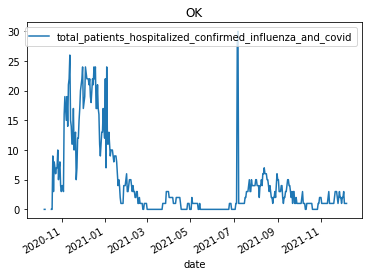

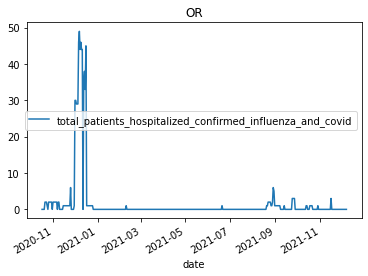

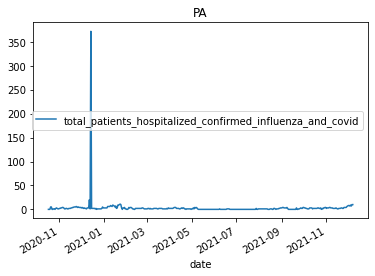

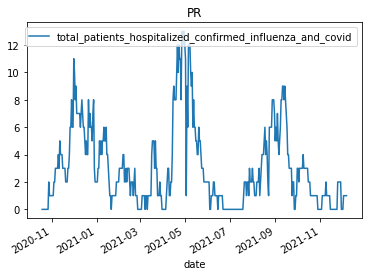

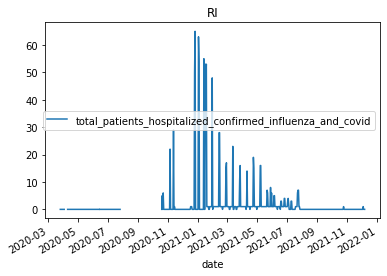

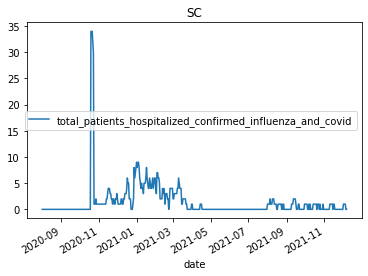

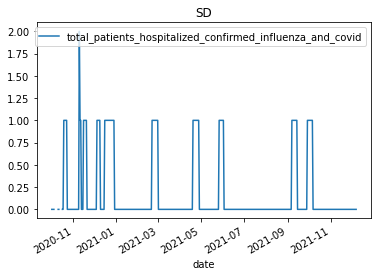

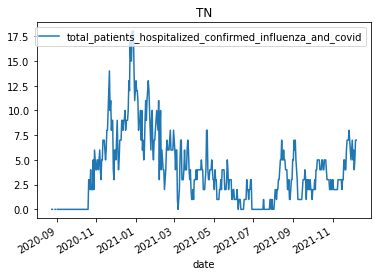

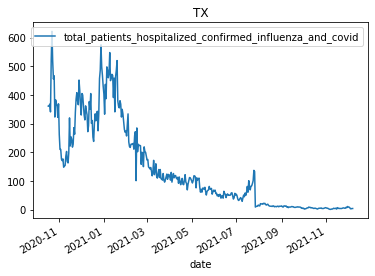

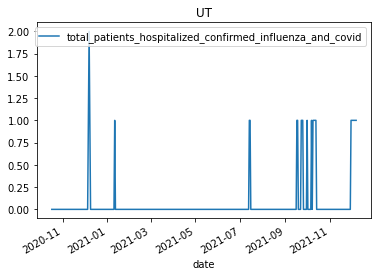

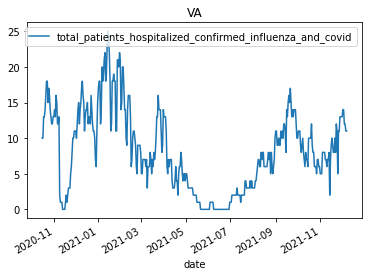

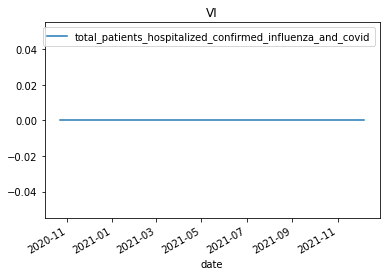

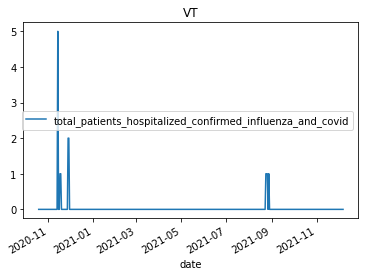

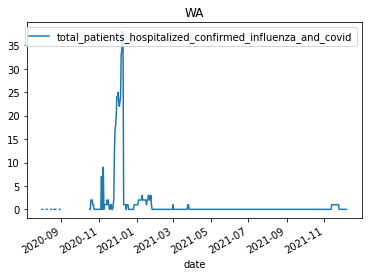

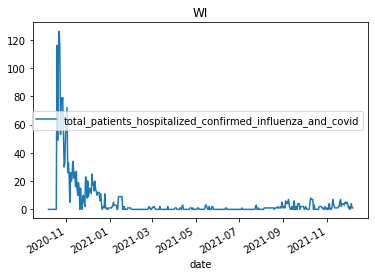

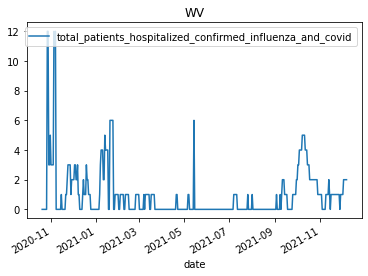

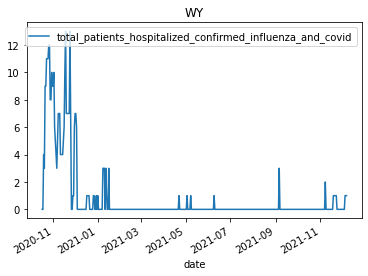

In [16]:
for state in list(grouped_data_us.index):
    df[df['state']==state].plot("date", "total_patients_hospitalized_confirmed_influenza_and_covid"
    )

In [17]:
grouped_data_us

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,...,previous_day_admission_influenza_confirmed,previous_day_admission_influenza_confirmed_coverage,previous_day_deaths_covid_and_influenza,previous_day_deaths_covid_and_influenza_coverage,previous_day_deaths_influenza,previous_day_deaths_influenza_coverage,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,total_patients_hospitalized_confirmed_influenza_and_covid_coverage,total_patients_hospitalized_confirmed_influenza_coverage
state,,,,,,,,,,,,,,,,,,,,,
AK,1235,9682,3863,1391,9490,3899,902.0,12540,960289.0,14341,...,186.0,9281,0.0,9280,1.0,9280,195.0,195.0,9279,9285
AL,15593,36043,18833,17232,33953,19284,7269.0,63732,8961075.0,67119,...,1243.0,42016,50.0,41999,31.0,41985,9574.0,2269.0,41989,42322
AR,11343,39326,10069,12498,37890,10350,3845.0,58394,5351626.0,59969,...,643.0,41726,11.0,41697,65.0,41693,4151.0,1049.0,41721,41725
AS,0,106,0,0,106,0,0.0,106,15900.0,106,...,0.0,106,0.0,106,0.0,106,0.0,0.0,106,106
AZ,14554,40492,12981,15331,39621,13075,11348.0,62583,9051896.0,64403,...,763.0,45880,8.0,45859,18.0,45877,11381.0,1538.0,45881,45881
CA,46410,141107,59574,55316,131699,60076,30512.0,229427,38782318.0,237557,...,1336.0,153720,59.0,153749,97.0,153756,14149.0,11819.0,153718,153787
CO,4340,39831,14757,4462,39466,15000,5095.0,56377,6404083.0,56846,...,182.0,38693,0.0,38683,1.0,38690,1694.0,415.0,38683,38698
CT,1320,14472,6401,1364,14422,6407,8166.0,20935,5075420.0,21444,...,42.0,15007,0.0,14970,1.0,14969,184.0,81.0,14947,15007
DC,233,5917,2045,216,5934,2045,2242.0,7182,2053137.0,8083,...,9.0,4753,0.0,4748,1.0,4746,291.0,34.0,4749,4752
